<a href="https://colab.research.google.com/github/ShaunakSen/Data-Science-and-Machine-Learning/blob/master/Machine_Learning_Interpretibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A Unique Method for Machine Learning Interpretability: Game Theory & Shapley Values!

[article link by ANKIT CHOUDHARY](https://www.analyticsvidhya.com/blog/2019/11/shapley-value-machine-learning-interpretability-game-theory/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29)

### What Is Game Theory

The key pioneers of game theory were mathematicians John von Neumann and John Nash, as well as economist Oskar Morgenstern.

Now, you might be asking – what is a game? Is it like chess? Video Games?

A “Game” is any situation in which there are several decision-makers, and each of them wants to optimize their results. The optimizing decision will depend on the decisions of others. The game identifies the players’ identities, preferences, and available strategies and how these strategies affect the outcome.

Game Theory attempts to define these situations in mathematical terms and determine what would happen if every player acts rationally.

- Perhaps an equilibrium can be reached (which is why we all drive on the same side of the road within a country)
- Maybe this equilibrium will be worse for all players (which is why people litter or pollute common resources)
- Well, everyone will try to be as unpredictable as possible in their actions (as might happen with troop deployment in a war)


In essence, Game Theory is a way to mathematically model complex human behavior, to try to understand it, and predict it.

### Cooperative Game Theory

> Cooperative game theory assumes that groups of players, called coalitions, are the primary units of decision-making, and may enforce cooperative behavior.


Consequently, cooperative games can be seen as a competition between coalitions of players, rather than between individual players.



### The Intuition behind Shapley Values


Let’s first design a cooperative game. Three friends – Ram, Abhiraj, and Pranav – go out for a meal. They order and share fries, wine, and pi. It is hard to figure out who should pay how much since they did not eat an equal share. So, we have the following information:

- If Ram is eating alone, he would pay 800
- If Abhiraj is eating alone, he would pay 560
- If Pranav is eating alone, he would pay 700
- If Ram and Abhiraj both eat alone, they would pay 800
- If Ram and Pranav both eat alone, they would pay 850
- If Abhiraj and Pranav both eat alone, they would pay 720
- If Ram, Abhiraj, and Pranav all eat together, they would pay 900

So, it turns out the actual amount all 3 of them pay when they eat together is 900. Now, the task at hand is to figure out how much each of them should pay individually.

The method we will adapt here is:

> We take all permutations of the 3 participants in sequence and see the incremental payout that each of them has to make.

So here, the sequence is Ram, Abhiraj and then Pranav in turn. As described above, Ram comes and pays 800. Now, Ram and Abhiraj pay 800 only so there is no additional payout for Abhiraj. Hence, we get 0. And finally, all 3 eat together and pay 900 so the additional payout for Pranav is 100.

We repeat the same exercise for each possible order for the 3 friends and get the following marginal payout values:

- (Ram, Abhiraj, Pranav) – (800,0,100)
- (Abhiraj, Ram, Pranav) – (560, 240, 100)
- (Abhiraj, Pranav, Ram) – (560, 160, 180)
- (Pranav, Ram, Abhiraj) – (700, 150, 50)
- (Pranav, Abhiraj, Ram) – (700, 20, 180)
- (Ram, Pranav, Abhiraj) – (800, 50, 50)

**So, what is the Shapley value for Ram, Abhiraj, and Pranav each? It is just the average of the marginal payout for each!**

For example, for Ram it is (800 + 240 + 180 + 150 + 180 + 800)/6 = 392. Similarly, for Abhiraj it is 207, and for Pranav, it turns out to be 303. The total turns out to be 900.

So now we have reached to the final amount that each of them should pay if all 3 go out together. In the next section, we will see how we can use the concept of Shapley values to interpret machine learning models.

### Shapley Values for Machine Learning Interpretability

You have an intuition behind what Shapley values are – so take a moment to think about how they could help in interpreting a black-box machine learning model.

We know that each value of an independent variable or a feature for a given sample is a part of a cooperative game where we assume that prediction is actually the payout. So, let us dive into another example to understand this in detail.

Assume the following scenario:

We have trained a machine learning model to predict house prices in Delhi. For a certain house, our model predicts INR 51,00,000 and we need to explain this prediction. The apartment has a size of 50 yards, has a private pool and also a garage:

![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2019/11/Screenshot-2019-11-08-at-2.36.28-PM-768x257.png)

The average prediction for all apartments is INR 50,00,000. How much has each feature value contributed to the prediction compared to the average prediction?

Now, if we talk in terms of Game Theory, the “game” here is the prediction task for a single instance of the dataset. The “players” are the feature values of the instance that collaborate to play the game (predict a value) similar to the meal example where Pranav, Ram, and Abhiraj went for a meal together.

In our house example, the feature values `has_pool, has_garageand area-50` worked together to achieve the prediction of INR 51,00,000. Our goal is to explain the difference between the actual prediction (INR 51,00,000) and the average prediction (50,00,000): a difference of INR 1,00,000.

A possible explanation could be has_pool contributed INR 30,000, garage contributed INR 50,000, and area of 50 yards contributed INR 20,000. The contributions add up to INR 1,00,000 – the final prediction minus the average predicted house price.

> To summarise, the Shapley value for each variable (payout) is basically trying to find the correct weight such that the sum of all Shapley values is the difference between the predictions and average value of the model. In other words, Shapley values correspond to the contribution of each feature towards pushing the prediction away from the expected value.

Now that we have understood the underlying intuition for Shapley values and how useful they can be in interpreting machine learning models, let us look at its implementation in Python.



### Model Interpretation using SHAP in Python

The SHAP library in Python has inbuilt functions to use Shapley values for interpreting machine learning models. It has optimized functions for interpreting tree-based models and a model agnostic explainer function for interpreting any black-box model for which the predictions are known.

In the model agnostic explainer, SHAP leverages Shapley values in the below manner. To get the importance of feature X{i}:

- Get all subsets of features S that do not contain X{i}
- Compute effect on our predictions of adding X{i} to all those subsets
- Aggregate all contributions to compute the marginal contribution of the feature

The problem statement is about predicting sales for different items being sold at different outlets. You can download the dataset from the above link. We will use Shapley values and also go through some visualizations to look at both local and global interpretations.



In [36]:
!pip install shap

In [0]:
import pandas as pd
import numpy as np
import shap 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [38]:
# reading the data

df = pd.read_csv('./train_kOBLwZA.csv')

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### MVT

In [0]:
# imputing missing values in Item_Weight by median and Outlet_Size with mode

df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode().values[0], inplace=True)

In [40]:
df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

### Feature Engineering

In [41]:
# Feature Engineering
# creating a broad category of type of Items

df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda df: df[0:2])

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [42]:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


In [43]:
df['Item_Type_Combined'].value_counts()


Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [44]:
# operating years of the store
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

df['Outlet_Years'].value_counts()

28    1463
26     932
14     930
9      930
16     930
11     929
4      928
6      926
15     555
Name: Outlet_Years, dtype: int64

In [45]:
# modifying categories of Item_Fat_Content

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Data Preprocessing



In [46]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


In [47]:
# label encoding the ordinal variables
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years,Outlet
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14,9
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4,3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14,9
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,15,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26,1


In [0]:
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
  df[i] = le.fit_transform(df[i])

In [49]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,1,14,9
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,0,4,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,1,14,9
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,1,15,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,2,26,1


In [0]:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [51]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,14,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,4,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,14,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,15,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,26,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


### Train-Test Split



In [0]:
# dropping the ID variables and variables that have been used to extract new variables
df.drop(['Item_Type','Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier'],axis=1,inplace=True)

# separating the dependent and independent variables
X = df.drop('Item_Outlet_Sales',1)
y = df['Item_Outlet_Sales']

# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)


### Initialize Shap



In [53]:
# Need to load JS vis in the notebook
shap.initjs()


### Fitting XGBoost



In [54]:
xgb_model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001, random_state=0)
xgb_model.fit(X_train, y_train)

[16:51:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [55]:
y_predict = xgb_model.predict(X_test)

mean_squared_error(y_test, y_predict)**(0.5)


1394.5361315728821

### Local Interpretation using SHAP (for prediction at id number 4776)



In [0]:
explainer = shap.TreeExplainer(model=xgb_model)

In [57]:

shap_values = explainer.shap_values(X_train, approximate=True)

shap_values

array([[ -17.633068 , -208.4722   , 1130.1544   , ...,    0.       ,
           0.       ,    0.       ],
       [  65.426865 ,  225.3461   ,  346.3633   , ...,    0.       ,
           7.7163744,    0.       ],
       [ 103.407455 ,  -74.56526  ,  162.60527  , ...,    0.       ,
           0.       ,   91.4148   ],
       ...,
       [  69.14758  ,  171.24805  , 1044.3549   , ...,   -1.415194 ,
           4.0740995,    0.       ],
       [ -29.837076 ,  -59.73135  , -246.52766  , ...,   11.796763 ,
           0.       ,    0.       ],
       [  11.921765 ,    5.669675 , -457.07297  , ...,    3.1947699,
           0.       ,    0.       ]], dtype=float32)

In [58]:
X_train.shape

(6392, 29)

In [59]:
shap_values.shape

(6392, 29)

In [60]:
explainer.expected_value

1377.2058

In [61]:
X_train.loc[4776]

Item_Weight                16.350000
Item_Visibility             0.029565
Item_MRP                  256.464600
Outlet_Years                4.000000
Item_Fat_Content_0          1.000000
Item_Fat_Content_1          0.000000
Outlet_Location_Type_0      0.000000
Outlet_Location_Type_1      0.000000
Outlet_Location_Type_2      1.000000
Outlet_Size_0               0.000000
Outlet_Size_1               1.000000
Outlet_Size_2               0.000000
Outlet_Type_0               0.000000
Outlet_Type_1               0.000000
Outlet_Type_2               1.000000
Outlet_Type_3               0.000000
Item_Type_Combined_0        0.000000
Item_Type_Combined_1        0.000000
Item_Type_Combined_2        1.000000
Outlet_0                    0.000000
Outlet_1                    0.000000
Outlet_2                    0.000000
Outlet_3                    1.000000
Outlet_4                    0.000000
Outlet_5                    0.000000
Outlet_6                    0.000000
Outlet_7                    0.000000
O

In [62]:
i = 4776
shap.force_plot(explainer.expected_value, shap_values[i], features=X_train.loc[4776], feature_names=X_train.columns)

(506, 13) (506,)


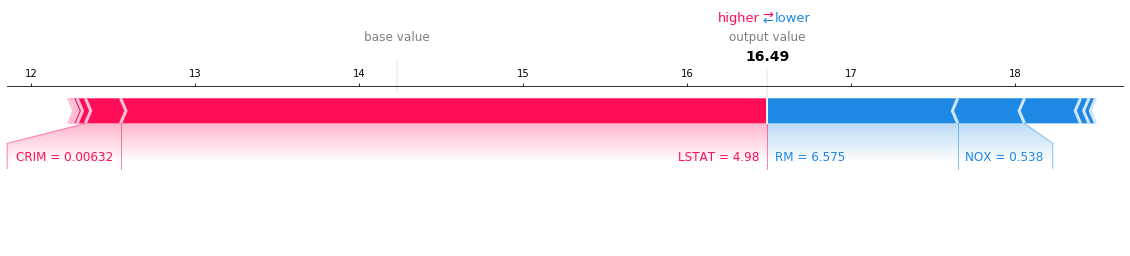

In [63]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model 
X,y = shap.datasets.boston()

print (X.shape, y.shape)
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X )

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:], matplotlib=True)

## Interpreting complex models with SHAP values

[article by Gabriel Tseng](https://medium.com/@gabrieltseng/interpreting-complex-models-with-shap-values-1c187db6ec83)

An important question in the field of machine learning is why an algorithm made a certain decision.
This is important for a variety of reasons. As an end user, I am more likely to trust a recommendation if I understand why it was exposed to me. As an organization, understanding that customers made a purchase because this campaign was particularly effective can allow me to tailor my future outreach efforts.
However, this is a challenging and still developing field in machine learning. In this post, I am going to discuss exactly what it means to interpret a model, and explore a novel technique called SHAP (https://github.com/slundberg/shap) which is particularly effective at allowing us to take the hood off complex algorithms.

### What does it mean to interpret a model (and why is it so hard)?

Let’s start by defining exactly what it means to interpret a model. At a very high level, I want to understand what motivated a certain prediction.
For instance, lets reuse the problem from the XGBoost documentation, where given the age, gender and occupation of an individual, I want to predict whether or not they will like computer games:

![](https://miro.medium.com/max/912/1*TebQuJsPc7upto5dvURjSA.png)

In this case, my input features are age, gender and occupation. I want to know how these features impacted the model’s prediction that someone would like computer games.
However, there are two different ways to interpret this:

1. On a global level. Looking at the entire dataset, which features did the algorithm find most predictive? XGBoost’s get_score() function - which counts how many times a feature was used to split the data – is an example of considering global feature importance, since it looks at what was learned from all the data.

2. **On a local level**. Maybe, across all individuals, age was the most important feature, and younger people are much more likely to like computer games. But if Frank is a 50-year-old who works as a video game tester, it’s likely that his occupation is going to be much more significant than his age in determining whether he likes computer games. Identifying which features were most important for Frank specifically involves finding feature importances on a ‘local’ – individual – level.

### Trading off between interpretablity and complexity


Let’s consider a very simple model: a linear regression. The output of the model is

![](https://miro.medium.com/max/902/1*Ts8kTUMdcLFDotRCWauASQ@2x.png)

In the linear regression model above, I assign each of my features x_i a coefficient ϕ_i, and add everything up to get my output. In the case of my computer games problem, my input features would be (x_Age, x_Gender, x_Job).

In this case, its super easy to find the importance of a feature; if ϕ_i has a large absolute value, then feature xi had a big impact on the final outcome (e.g. if ∣ϕ_Age∣ is large, then age was an important feature). However, there is also a drawback, which is that this model is so simple that it can only uncover linear relationships.

For instance, maybe age is an important feature, and if you’re between 12 and 18 you’re much more likely to like computer games than at any other age; since this is a non-linear relationship, a linear regression wouldn’t be able to uncover it.

In order to uncover this more complicated relationship, I’ll need a more complicated model.
However, as soon as I start using more complicated models, I lose the ease of interpretability which I got with this linear model. In fact, as soon as I try to start uncovering non-linear, or even interwoven relationships — e.g. what if age is important depending on your gender? — then it becomes very tricky to interpret the model.

This decision — between an easy to interpret model which can only uncover simple relationships, or complex models which can find very interesting patterns that may be difficult to interpret — is the trade off between interpretability and complexity.
This is additionally complicated by the fact that I might be interpreting a model because I’m hoping to learn something new and interesting about the data. If this is the case, a linear model may not cut it, since I may already be familiar with the relationships it would uncover.
The ideal case would therefore be to have a complex model which I can also interpret.

### How can we interpret complex models?

Thinking about linear regressions has yielded a good way of thinking about model interpretations:
I’ll assign to each feature x_i a coefficient ϕ_i which describes — linearly — how the feature affects the output of the model. We’ve already discussed the shortcomings of this model, but bear with me:

**Across many data points, the coefficients ϕ will fail to capture complex relationships. But on an individual level, then they’ll do fine, since for a single prediction, each variable will truly have impacted the model’s prediction by a constant value.**

For instance, consider the case of Frank, the 50-year-old video game tester who loves computer games. For him, ϕ_Job will be high and ϕ_Age will be low.

But then, for Bobby, a 14-year-old, ϕ_Age will be high since the model has see that 14-year olds tend love computer games because they are 14 years old.

**What we’ve done here is take a complex model, which has learnt non-linear patterns in the data, and broken it down into lots of linear models which describe individual data points. Its important to note that these explanation coefficients ϕ are not the output of the model, but rather what we are using to interpret this model. By aggregating all of these simple, individual models together, we can understand how the model behaves across all the customers.**

So, to sum up:

Instead of trying to explain the whole complex model, I am just going to try and explain how the complex model behaved for one data point. I’ll do this using a linear explanation model; let’s call it g.

In addition, to further simplify my simple model, I won’t multiply the coefficients ϕ by the original feature value, x. Instead, I’ll multiply it by 1 if the feature is present, and 0 if it is not.

In the case of predicting who loves computer games, what I therefore get is the following:

![](https://miro.medium.com/max/950/1*geF_00XqR6uajh1-gFTLbw@2x.png)

where g_Frank=p_Frank, the original prediction of the model for Frank.


Note that the coefficients apply only to Frank; if I want to find how the model behaved for Bobby, I’ll need to find a new set of coefficients. In addition, since Bobby doesn’t have a job, I multiplied ϕ_Bobby Job by 0 (since there isn’t an x_Bobby Job). His simple model will therefore be

![](https://miro.medium.com/max/730/1*sUn4qN-zcdkD55CGwtyxRA@2x.png)

I’ll do this for all the data points and aggregate it to get an idea of how my model worked globally.


Now that I have this framework within which to interpret complex models, I need to think about exactly what properties I want ϕ to capture to be useful.


### Shapley values (or, how can I calculate ϕ?)


The solution to finding the values of ϕ predates machine learning. In fact, it has its foundations in game theory.

Consider the following scenario: a group of people are playing a game. As a result of playing this game, they receive a certain reward; how can they divide this reward between themselves in a way which reflects each of their contributions?

There are a few things which everyone can agree on; meeting the following conditions will mean the game is ‘fair’ according to Shapley values:


1. The sum of what everyone receives should equal the total reward
2. If two people contributed the same value, then they should receive the same amount from the reward
3. Someone who contributed no value should receive nothing
4. If the group plays two games, then an individual’s reward from both games should equal their reward from their first game plus their reward from the second game

These are fairly intuitive rules to have when dividing a reward, and they translate nicely to the machine learning problem we are trying to solve. In a machine learning problem, the reward is the final prediction of the complex model, and the participants in the game are features. Translating these rules into our previous notation:

1. g_Frank should be equal to p_Frank, the probability the complex model assigned to Frank of liking computer games.
2. If two features x contributed the same value to the final prediction, then their coefficients ϕ should have the same value
3. If a feature contributed nothing to the final prediction (or if it is missing), then its contribution to g should be 0
4. If I add up g_(Frank+Bobby) then this should be equal to g_Frank+g_Bobby

It’s worth noting that so far, our simple model by default respects rules 3 and 4.

It turns out that there is only one method of calculating ϕ so that it will also respect rules 1 and 2. Lloyd Shapley introduced this method in 1953 (which is why values of ϕ calculated in this way are known as Shapley values).
The Shapley value for a certain feature i (out of n total features), given a prediction p (this is the prediction by the complex model) is

![](https://miro.medium.com/max/998/1*hzAZXuIihO2t5fQ63_87gw@2x.png)

There’s a bit to unpack here, but this is also much more intuitive than it looks. At a very high level, what this equation does is calculate what the prediction of the model would be without feature i, calculate the prediction of the model with feature i, and then calculate the difference:

![](https://miro.medium.com/max/928/1*P80HZgIAXir21BTWz7Xi6g@2x.png)

This is intuitive; I can just add features and see how the model’s prediction changes as it sees new features. The change in the model’s prediction is essentially the effect of the feature.

However, the order in which you add features is important to how you assign their values. Let’s consider Bobby’s example to understand why; it’s the fact that he is both 14 and male that means he has a high chance of liking computer games. This means that whichever feature we add second will get a disproportionately high weighting, since the model will see that Bobby is a really likely candidate for liking computer games only when it has both pieces of information.


To better illustrate this, lets imagine that we are trying to assign feature values to the decision tree from the XGBoost documentation. Different implementations of decision trees have different ways of dealing with missing values, but for this toy example, lets say that if a value the tree splits on is missing, it calculates the average of the leaves below it.
As a reminder, here is the decision tree (with Bobby labelled):

![](https://miro.medium.com/max/1500/1*GVzbGLWhEIUUrnT92QBzZA.png)


First, we’ll see Bobby’s age, and then his gender.

When the model sees Bobby’s age, it will take him left on the first split. Then, since it doesn’t have a gender yet, it will assign him the average of the leaves below, or (2 + 0.1) / 2 = 1.05. So the effect of the age feature is 1.05.

Then, when the model learns he is male, it will give him a score of 2. The effect of the gender feature is therefore 2−1.05=0.95.

So in this scenario, ϕ_Age Bobby=1.05 and ϕ_Gender Bobby=0.95.

Next, lets say we see his gender, and then his age.

In the case where we only have a gender, the model doesn’t have an age to split on. It therefore has to take an average of all the leaves below the root.


First, the average of the depth 2 leaves: (2 + 0.1) / 2 = 1.05. This result is then averaged with the other depth 1 leaf: (1.05 + (-1)) / 2 = 0.025. So, the effect of the gender feature is 0.025.

Then, when the model learns he is 14, it gives him a score of 2. The effect of the age feature is then (2–0.025)=1.975.

So in this scenario, ϕ_Age Bobby=1.975 and ϕ_Gender Bobby=0.025.


Which value should we assign ϕ_Age Bobby? If we assign ϕ_Age Bobby a value of 1.975, does this mean we assign ϕ_Gender Bobby a value of 0.025 (since, by rule 1 of Shapley fairness, the total coefficients must equal the final prediction of the model for Bobby, in this case 2)?

This is far from ideal, since it ignores the first sequence, in which ϕ_Gender Bobby would get 0.95 and ϕ_Age Bobby would get 1.05.


What a Shapley value does is consider both values, calculating a weighted sum to find the final value. This is why the equation for ϕ_i(p) must permute over all possible sets of S of feature groupings (minus the feature i we are interested in). This is described in S⊆N/i below the summation, where N is all the features.

How are the weights assigned to each component of the sum? It basically considers how many different permutations of the sets exist, considering both the features which are in the set S (this is done by the ∣S∣!) as well as the features which have yet to be added (this is done by the (n−∣S∣−1)!. Finally, everything is normalized by the features we have in total.



### Calculating a Shapley value


For Bobby, what would the Shapley value be for his age?


![](https://miro.medium.com/max/998/1*hzAZXuIihO2t5fQ63_87gw@2x.png)


First, I need to construct my sets S. These are all possible combinations of Bobby’s features, excluding his age. Since he only has one other feature — his gender — this yields two sets: {x_Gender}, and an empty set {}.


Next, I need to calculate ϕ_i(p) or each of these sets, S. Note than as I have 2 features, n=2.


**In the case where S = {}:**


The prediction of the model when it sees no features is the average of all the leaves, which we have calculated to be 0.025. We’ve also calculated that when it sees only the age, it is 1.05, so

![](https://miro.medium.com/max/878/1*Z7Z7Ff7wbo8XV2hQELislw@2x.png)

This yields

![](https://miro.medium.com/max/1432/1*S8mMBghBAMwdi4SSpP6YFA@2x.png)

**In the case where S = {x_Gender}:**

![](https://miro.medium.com/max/428/1*6ARpT9VnIO8_ZWjp_eHWsg@2x.png)

We’ve calculated that the prediction of the model with only the gender is 0.025, and then when it sees both his age and his gender is 2, so


![](https://miro.medium.com/max/828/1*JKAYttMODx8UasMPPX6i9g@2x.png)

So

![](https://miro.medium.com/max/1422/1*p9QfGRiZIbaBC7gl8didqQ@2x.png)

Adding these two values together yields


![](https://miro.medium.com/max/822/1*O5nUAoV8tGkyjQsrNRMvVg@2x.png)

Note that this value makes sense; its right in the middle of what we calculated when we calculated feature importance just by adding features one by one.


> In summary, Shapley values calculate the importance of a feature by comparing what a model predicts with and without the feature. However, since the order in which a model sees features can affect its predictions, this is done in every possible order, so that the features are fairly compared.

### Shap values


Unfortunately, going through all possible combinations of features quickly becomes computationally unfeasible.

Luckily, the SHAP library introduces optimizations which allow Shapley values to be used in practice. It does this by developing model specific algorithms, which take advantage of different model’s structures. For instance, SHAP’s integration with gradient boosted decision trees takes advantage of the hierarchy in a decision tree’s features to calculate the SHAP values.

This allows the SHAP library to calculate Shapley values significantly faster than if a model prediction had to be calculated for every possible combination of features.

## Explain Your Model with the SHAP Values

[article by Dataman](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d)


The SHAP (SHapley Additive exPlanations) deserves its own space rather than an extension of the Shapley value. Inspired by several methods (1,2,3,4,5,6,7) on model interpretability, Lundberg and Lee (2016) proposed the SHAP value as a united approach to explain the output of any machine learning model. Three benefits worth mentioning here.

- The first one is global interpretability — the collective SHAP values can show how much each predictor contributes, either positively or negatively, to the target variable. This is like the variable importance plot but it is able to show the positive or negative relationship for each variable with the target (see the SHAP value plot below).
- The second benefit is local interpretability — each observation gets its own set of SHAP values (see the individual SHAP value plot below). This greatly increases its transparency. We can explain why a case receives its prediction and the contributions of the predictors. Traditional variable importance algorithms only show the results across the entire population but not on each individual case. The local interpretability enables us to pinpoint and contrast the impacts of the factors.
- Third, the SHAP values can be calculated for any tree-based model, while other methods use linear regression or logistic regression models as the surrogate models.

### How to Use It in Python?


I am going to use the red wine quality data in Kaggle.com to do the analysis. The target value of this dataset is the quality rating from low to high (0–10). The input variables are the content of each wine sample including fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates and alcohol. There are 1,599 wine samples.


In this post I build a random forest regression model and will use the TreeExplainer in SHAP. Some readers have asked if there is one SHAP Explainer for any ML algorithm — either tree-based or non-tree-based algorithms. Yes, there is. It is called the KernelExplainer. Please read my second post [“Explain Any Models with the SHAP Values — Use the KernelExplainer”](https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a).


In [5]:
df = pd.read_csv('./winequality-red.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
Y = df['quality']
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]

# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

### Variable Importance Plot — Global Interpretability

The shap.summary_plot function with plot_type=”bar” let you produce the variable importance plot. A variable importance plot lists the most significant variables in descending order. The top variables contribute more to the model than the bottom ones and thus have high predictive power.

In [8]:
shap_values = shap.TreeExplainer(model=model).shap_values(X_train)

print (shap_values.shape, X_train.shape)

(1279, 11) (1279, 11)


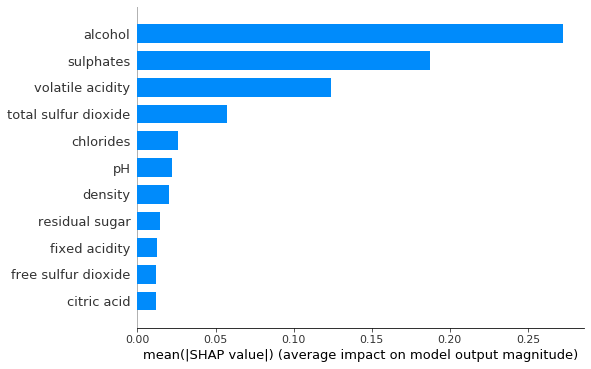

In [9]:
shap.summary_plot(shap_values, X_train, plot_type="bar")


The SHAP value plot can further show the positive and negative relationships of the predictors with the target variable. The code shap.summary_plot(shap_values, X_train)produces the following plot:

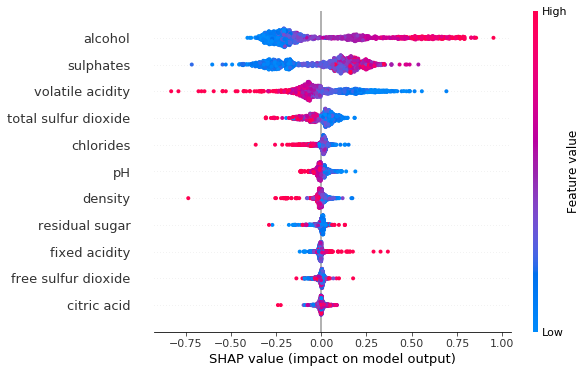

In [10]:
shap.summary_plot(shap_values, X_train)

This plot is made of all the dots in the train data. It demonstrates the following information:

- Feature importance: Variables are ranked in descending order.
- Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.
- Correlation: A high level of the “alcohol” content has a high and positive impact on the quality rating. The “high” comes from the red color, and the “positive” impact is shown on the X-axis. Similarly, we will say the “volatile acidity” is negatively correlated with the target variable.


###  SHAP Dependence Plot — Global Interpretability

You may ask how to show a partial dependence plot. The partial dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model (J. H. Friedman 2001). It tells whether the relationship between the target and a feature is linear, monotonic or more complex. In order to create a dependence plot, you only need one line of code: `shap.dependence_plot(“alcohol”, shap_values, X_train)`. The function automatically includes another variable that your chosen variable interacts most with. The following plot shows there is an approximately linear and positive trend between “alcohol” and the target variable, and “alcohol” interacts with “sulphates” frequently.

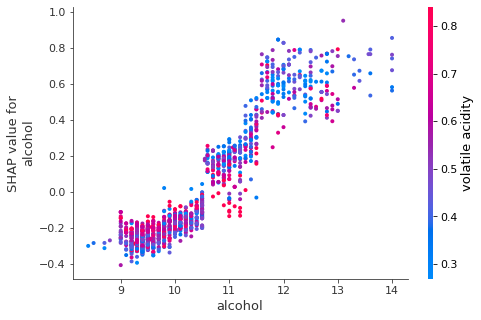

In [12]:
shap.dependence_plot('alcohol', shap_values, X_train)

Suppose you want to know “volatile acidity” and the variable that it interacts the most, you can do shap.dependence_plot(“volatile acidity”, shap_values, X_train). The plot below shows there exists an approximately linear but negative relationship between “volatile acidity” and the target variable. This negative relationship is already demonstrated in the variable importance plot Exhibit (K).

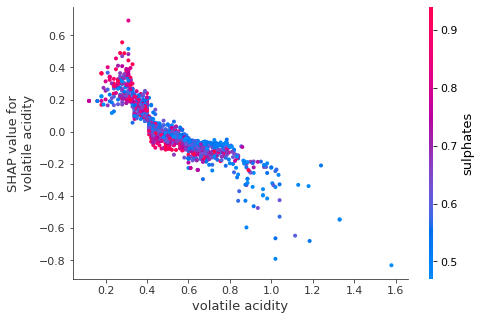

In [13]:
shap.dependence_plot('volatile acidity', shap_values, X_train)

### Individual SHAP Value Plot — Local Interpretability

In order to show you how the SHAP values can be done on individual cases, I will execute on several observations. I randomly chose a few observations in as shown in Table B below:


In [15]:
X_output = X_test.copy()

X_output.loc[:,'predict'] = np.round(model.predict(X_output),2)

print (X_output.shape)

X_output.head()

(320, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predict
165,7.8,0.630,0.48,1.7,0.100,14.0,96.0,0.99610,3.19,0.62,9.5,5.20
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,6.55
575,12.3,0.270,0.49,3.1,0.079,28.0,46.0,0.99930,3.20,0.80,10.2,6.56
856,9.3,0.360,0.39,1.5,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,6.03
445,9.5,0.735,0.10,2.1,0.079,6.0,31.0,0.99860,3.23,0.56,10.1,5.21


In [19]:
# Randomly pick some observations

random_picks = np.arange(1, X_output.shape[0], 50)

S = X_output.iloc[random_picks]

S

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predict
243,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.20,6.55
686,7.1,0.65,0.18,1.8,0.070,13.0,40.0,0.99700,3.44,0.60,9.10,5.49
1016,8.9,0.38,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.60,6.82
620,8.3,0.54,0.24,3.4,0.076,16.0,112.0,0.99760,3.27,0.61,9.40,5.20
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.40,6.71
1492,6.2,0.65,0.06,1.6,0.050,6.0,18.0,0.99348,3.57,0.54,11.95,5.38
636,9.6,0.88,0.28,2.4,0.086,30.0,147.0,0.99790,3.24,0.53,9.40,5.04


If you use Jupyter notebook, you will need to initialize it with initjs(). To save space, I write a small function shap_plot(j) to execute the SHAP values for the observations in Table B.

In [23]:
S.iloc[1]

fixed acidity            7.100
volatile acidity         0.650
citric acid              0.180
residual sugar           1.800
chlorides                0.070
free sulfur dioxide     13.000
total sulfur dioxide    40.000
density                  0.997
pH                       3.440
sulphates                0.600
alcohol                  9.100
predict                  5.490
Name: 686, dtype: float64

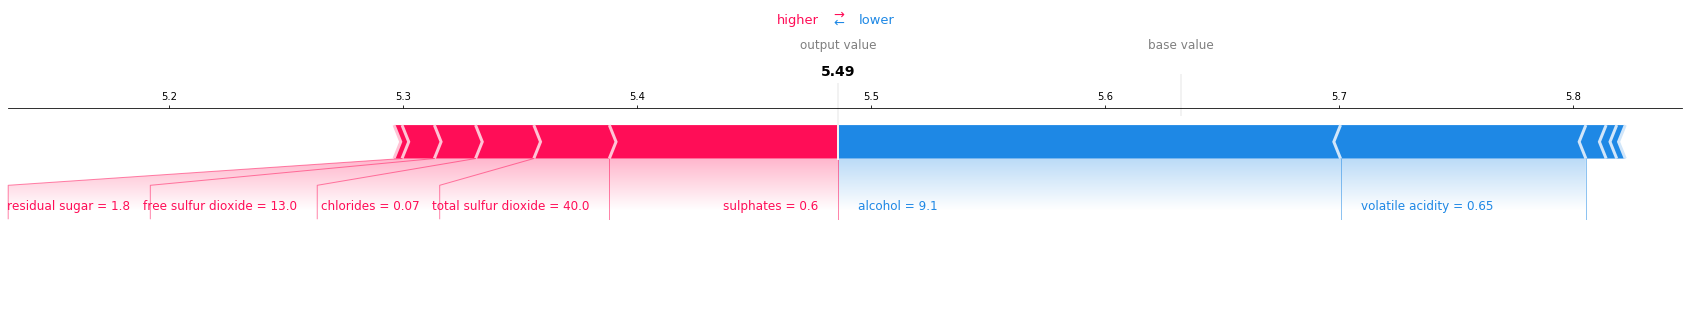

In [35]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()
def shap_plot(j):
  explainerModel = shap.TreeExplainer(model)
  shap_values_Model = explainerModel.shap_values(S)
  # print (shap_values_Model.shape)
  p = shap.force_plot(base_value=explainerModel.expected_value, shap_values=shap_values_Model[j], features=S.iloc[[j]], figsize=(30,4), matplotlib=True)
  return p
shap_plot(1)

In [33]:
print (list(S.columns))

print (shap_values[1])

print (S.iloc[[1]])

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'predict']
[ 0.06194308  0.39075701  0.0263452   0.00056038 -0.03372485  0.00584774
  0.06648602 -0.01369391  0.01819435  0.26280007  0.05097046]
     fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  predict
686            7.1              0.65         0.18  ...        0.6      9.1     5.49

[1 rows x 12 columns]


Let me walk you through the above code step by step. The above shap.force_plot() takes three values: the base value (explainerModel.expected_value), the SHAP values (shap_values_Model[j]) and the matrix of feature values (S.iloc[[j]]). The base value or the expected value is the average of the model output over the training data X_train. It is the base value used in the following plot.

When I execute shap_plot(0) I get the result for the first row of Table B:

![](https://miro.medium.com/max/724/1*q4vGZQNefGM2Dp_2JVAzoA.png)

Let me describe this elegant plot in great detail:


- The output value is the prediction for that observation (the prediction of the first row in Table B is 6.20).

- The base value: The original paper explains that the base value E(y_hat) is “the value that would be predicted if we did not know any features for the current output.” In other words, it is the mean prediction, or mean(yhat). You may wonder why it is 5.62. This is because the mean prediction of Y_test is 5.62. You can test it out by Y_test.mean() which produces 5.62.

- Red/blue: Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.

- Alcohol: has positive impact on the quality rating. The alcohol content of this wine is 11.8 (as shown in the first row of Table B) which is higher than the average value 10.41. So it pushes the prediction to the right. Similarly in the rendered plot above we see alchohol = 9.1 (less than avg) - so pushes the predn down. Also see teh corr shap value for alcohot - 0.26 - **strong linear relationship**

- pH: has a negative impact on the quality rating. A lower than the average pH (=3.26 < 3.0) drives the prediction to the right. The shap value corr to ph is -0.01369391

- Sulphates: is positively related to the quality rating. A lower than the average Sulphates (= 0.64 < 0.65) pushes the prediction to the left.

You may wonder how we know the average values of the predictors. Remember the SHAP model is built on the training data set. The means of the variables are: X_train.mean()

In [34]:
X_train.mean()

fixed acidity            8.330023
volatile acidity         0.528245
citric acid              0.273667
residual sugar           2.569156
chlorides                0.087234
free sulfur dioxide     15.785770
total sulfur dioxide    46.569977
density                  0.996749
pH                       3.309484
sulphates                0.660039
alcohol                 10.433112
dtype: float64